# Matplotlib
***
<br>

[Official documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)

## What is it?
Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python programming language [5].<br>
The library utilises a tree-like hierarchy structure to store its objects for each plot [3]. Matplotlib is a free open-sourced library<br>
which is continually improving. 

## Brief History
Matplotlib development started in the early 2000’s by John D. Hunter, a neurobiologist that emulated MATLAB’s capabilities to help<br> 
visualize electronic signals in the brain of epilepsy patients [1].Despite MATLAB’s limitations, it’s approach to plotting was retained<br>
in the pyplot sub module which was developed to interface with Matplotlib through a collection of functions [5]. 

<br>

## Pyplot
***
### Overview
This sub module is typically imported from the Matplotlib library under the “plt”alias name and can carry out the majority of Matplotlib’s<br> 
plotting capabilities with relatively intuitive syntax.<br>

Plotting via pyplot is considered the stateful approach to plotting with Matplotlib, where calls are made via plt.plot() and other top level<br>
pyplot functions which preserve states to keep track of the current figure and axes [3]. As described in *Python Plotting With Matplotlib <br>
(Guide) 2021*, the simplicity of pyplot’s plotting syntax can be attributed to its wrapper functions that essentially call Matplotlib’s more<br> 
complicated object orientated interface.

<br>

### Plotting
Functions can be found here: [pyplot functions](https://matplotlib.org/stable/api/pyplot_summary.html)

The pyplot library can do many different plots via different functions calls. The arguments accepted by the different pytplot plots are<br>
relatively similar, but for simplicity a worked example of a line plot will be explored.


<br>

#### Breakdown of plt.plot()
[Documentation:](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)  _matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)_

This *plot* functon:
- Accepts list of arguements (**args*) which can form a 2d-array via:
  - Lists of equal lengths (as used in *line_plot* function).
  - Numpy arrays of equal length.
  - Keyword strings, such as  reference to pandas dataframe columns.
-  View limits autoscale to data limits by default as scalex and scaley are set to True. This can be altered in the function or after the fact.
-  Data input is defaulted to None but one can pass data object if the object variables are declared.
-  Keyword arguements (***kwargs*) declared in or passed into the *plt.plot()* can format properties  like linewidth and marker color.<br>
One can also use shortcut string notation for some formatting operations (as used in *line_plot* function below, e.g blue dashes line = 'b--').


In [1]:
# Import the necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt               # for plotting
import numpy as np                            # for numerical operations

# default figure sizes of future plots in the notebook
plt.rcParams['figure.figsize'] = [10, 6]      

Text(0.5, 0.0, 'Figure 1')

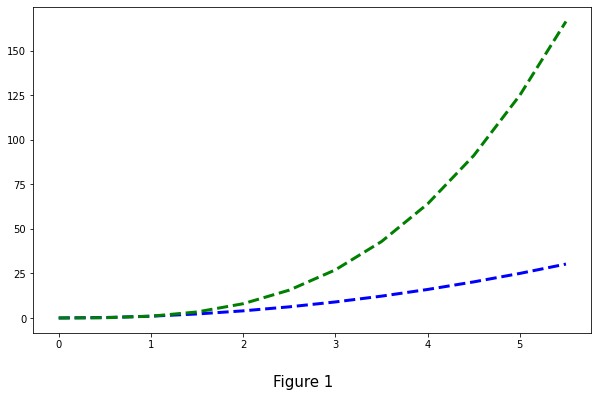

In [22]:

# define plot variables
x = np.arange(0, 6, 0.5)                      # generate list of 0-5 in increments of 0.5
y1 = x ** 2
y2 = x ** 3
y3 = x ** 4

#define plot labels
xy1_label = 'f(x)=x'
xy2_label = 'g(x)=x^2'
xy3_label = 'h(x)=x^3'

def line_plot():   
# pass the following arguements into plot function():
    # x and y lists of equal length
    # Shorthand string notation for colour / linestyle
    # linewidth value & label string (later used to format legend)
    plt.plot(x, y1, 'b--', linewidth = 3, label = xy1_label)  
    plt.plot(x, y2, 'g--', linewidth = 3, label = xy2_label) 
    
line_plot()

# Add Figure Reference
plt.figtext(0.5, 0.0, 'Figure 1', wrap = True, horizontalalignment = 'center', fontsize = 15)  

#### Additional Formatting 

Text(0.5, -0.05, 'Figure 2')

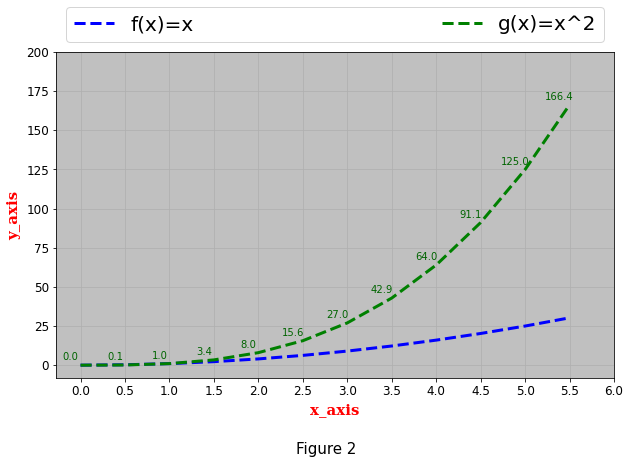

In [26]:
# Additional plot formatting (declared outside of the plot function)

plt.clf() #clear current figure


def format_plot():
    
    # plot format variables
    x_axis_label = 'x_axis'
    y_axis_label = 'y_axis'
    default_fontsize = 12
    label_pad = 5
    axis_font = {'family': 'serif',
        'color':  'red',
        'weight': 'bold',
        'size': 15,
        }

    # set axis labels, declare fontsize and distance from axis (labelpad)
    plt.xlabel(x_axis_label, fontdict = axis_font, labelpad = label_pad)
    plt.ylabel(y_axis_label, fontdict = axis_font, labelpad = label_pad)
    
    # alter scaling of y axis (this can be done in plot function either)
    plt.ylim(top = 200)
    
    # set fontsize of axis labels
    plt.xticks(fontsize = default_fontsize)
    plt.yticks(fontsize = default_fontsize)
    
    # alter tick frequency of x-axis to 0.5
    plt.xticks(np.arange(min(x), max(x) + 1, 0.5))
    
    # set current axis to a variable to call functions on it
    ax = plt.gca()                          # define ax variable as current axes if it exists
    ax.set_facecolor('silver')              # call set_facecolur method current axes
    ax.grid()                               # apply grid to current axes
    
    # annotate datapoint labels on data series
    # loop over index & val of series, then add text via annotate function
    # Adopted from: https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples
    for index, value in enumerate(y2):
        value = value.round(1)
        ax.annotate(value, (x[index], y2[index]), textcoords = "offset points", xytext = (-10, 5), ha = 'center',
                    color = 'darkgreen')
    
    # Place a legend on the current Axes (labels taken from artist as label declared in plot function)
    # Note: labels can also be passed as a list to plt.legend() 
        # bbox_to_anchor and loc are used together to position legend
        # mode set to expand stretches legend accross axes length
        # borderaxespad control distance between legend and legend border
    ax.legend(bbox_to_anchor = (0, 1, 1, 0.2), loc = "lower left", mode = "expand",
               borderaxespad = 0.5, ncol = 3, fontsize = 20)

line_plot()   
format_plot()
plt.figtext(0.5, -0.05, 'Figure 2', wrap = True, horizontalalignment = 'center', fontsize = 15)  

#### Preserving States
Note above that the *format_plot()* function formatted the plot generated by the *line_plot()* function. This behaviour However the figure generated by *line_plot()* did<br> 
not pass a reference to the figure it generated
Note that the *line_plot()* function called above did not pass any refernce of the current figure to the *format_plot()* function


to the current figure to the *format_plot()* function, and *plt.plot()* was not called within the *format_plot()* function.however the formatting of the<br>
plot still occured. This can be explained by *pyplots* ability to preserve various states enabling it to keep track of the current figure, whereby<br>
functions called are directed to the current axes. It is for this same reason that consecutive *plt.plot()* calls overlay lines on the current figure.<br>
It is also possible to overlay different plot types as shown below with the addition of a scatter series to the plot:


In [ ]:
def scatter_plot(): 
    plt.scatter(x, y3, s = 100, c = 'r', marker = 'o', label = xy3_label)
    
line_plot()
scatter_plot()
format_plot()
plt.show()

#### Generating subplots:

#### The stateful approach: subplot()

####  The stateless approach: subplots()

## Interesting Plots
***